In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df_train = pd.read_csv('D://datasets//TITANIC//train.csv')
df_test = pd.read_csv('D://datasets//TITANIC//test.csv')

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### **Feature Observations**

Here we will look at the potential of every feature in feature engineering.

**1. _PassengerID_** - does not have any indication to create a new feature from it.

**2. _Survived_** - is a class feature to be predicted with regard to each passengerin the test data thus no feature can be derived from it.

**3. _Pclass_** - is class feature detailing the ticket classification if 1st, 2nd, or 3rd and no feature can be got from it.

**4. _Name_** - is the string of words unique to each passenger but has potential to create **Title** and **Surname** features.

**4. _Sex_** - is categorical feature detailing passenger orientation if male or female and no feature can be created from it.

**5. _Age_** - is an ordinal unique feature showing amount of years lived and can create an **AgeGroup** categorical feature.

**6. _SibSp_** - is a feature showing the relationship of either Sibling or Spouse and create a **FamilySize** feature together with the **Parch** feature.

**7. _Parch_** - is a feature showing the relationship of either Parent or Child and can create a **FamilySize** feature together with the **SibSp** feature.

**8. _Ticket_** - is a feature detailing the unique ticket number of each passenger and can be explored to create **T_Prefix** feature.

**9. _Fare_** - is a feature showing the amount paid by each passenger and can help create a **FareGroup** feature.

**10. _Cabin_** - is a feature detailing in which cabin the passenger was in or assigned and could create a categorical **CabinClass** feature.

**11. _Embarked_** - is a feature detailing the port of entry by passenger and has no potent to create another feature.

#### **Initial Exploration**

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
1 - (df_train.count() / len(df_train))

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

**Observations**

1. Age has about 20% missing values which can be imputed with either mean, mode or median
2. Cabin has about 77% missing values and any imputation will give a distribution not representative of actual or close enough.
3. Emabarked has about 0.22% missing values giving an indication of an easy imputation of the missing values
4. All the other features do not have missing values.

In [8]:
df_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Observation**

1. Minimum fare is 0 and also seems not normal

#### **Imputation of Age and Embarked Features**

In [9]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

data = df_train[['Survived', 'Pclass', 'Sex','Age', 'SibSp','Parch', 'Fare', 'Embarked']]

In [10]:
# Sex and Embarked encoding

sx_em_dumm = pd.get_dummies(data[['Sex', 'Embarked']], drop_first=True)
data1 = pd.concat([data, sx_em_dumm], axis=1)
data1.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [11]:
# Scaling for KNN Imputer

scaler = MinMaxScaler()
datatrmd = scaler.fit_transform(data1)
df = pd.DataFrame(data=datatrmd, columns=data1.columns)

In [12]:
# Imputing Missing Values
knn_imputer = KNNImputer(weights='distance', copy=True)
df1 = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

In [13]:
datainv = scaler.inverse_transform(df1)
df2 = pd.DataFrame(data=datainv, columns=data1.columns)

In [14]:
# Inverse Encode Sex and Embarked

def sexify(feature):
  X = feature.copy()

  sex = []
  for i in X:
    if float(i) == 1.0:
      sex.append('male')
    else:
      sex.append('female')

  return sex

def embify(data):
  X = data.copy()
  embark = []

  for i in range(len(X)):
    if (X.iloc[i, 0] == 1.0)  & (X.iloc[i, 1] == 0.0):
      embark.append('Q')
    elif (X.iloc[i, 0] == 0.0) & (X.iloc[i, 1] == 1.0):
      embark.append('S')
    elif (X.iloc[i, 0] == 0.0) & (X.iloc[i, 1] == 0.0):
      embark.append('C')

  return embark

In [15]:
# Recreating the Sex feature
df2['Sex'] = sexify(df['Sex_male'])

In [16]:
# Recreating the Embarked Feature
df2['Embarked'] = embify(df[['Embarked_Q', 'Embarked_S']])

In [17]:
train_data = pd.concat([df2, df_train[['PassengerId', 'Name']]], axis=1)
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Sex,Embarked,PassengerId,Name
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,male,S,1,"Braund, Mr. Owen Harris"
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,female,C,2,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,female,S,3,"Heikkinen, Miss. Laina"
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,female,S,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,male,S,5,"Allen, Mr. William Henry"


#### **Exploration the Relationship of Features to Survival**

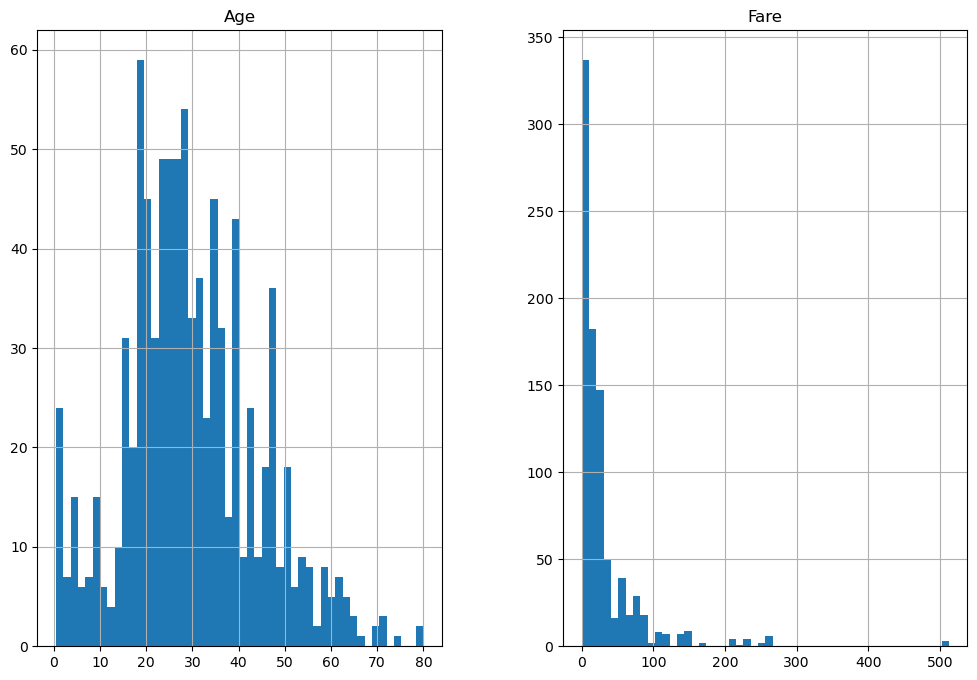

In [18]:
train_data[['Age', 'Fare']].hist(bins=50, figsize=(12, 8))
plt.show()

1. **Sex**

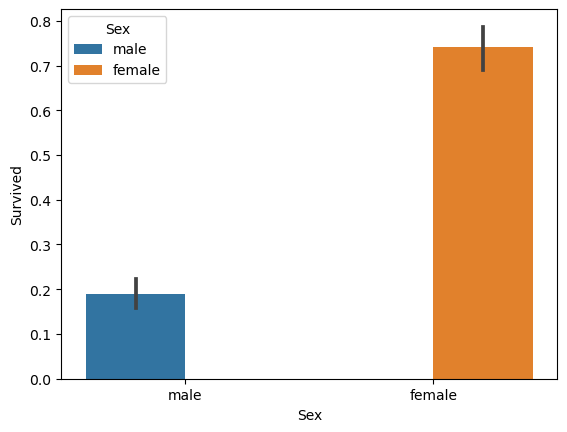

In [19]:
sns.barplot(data=train_data, x='Sex', y='Survived', hue='Sex')
plt.show()

**Observation**

Being a female, there is a likelihood to survive.

2. **Pclass**

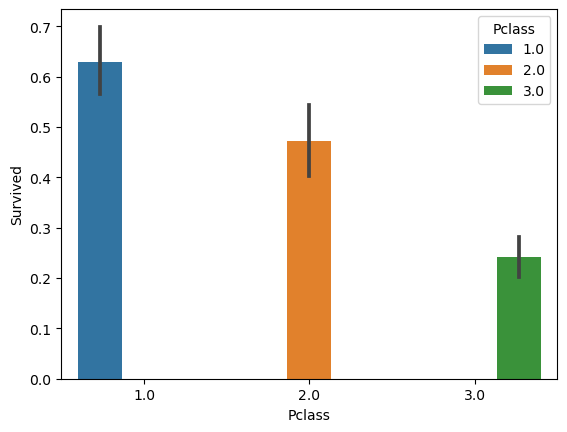

In [20]:
sns.barplot(data=train_data, x= 'Pclass', y='Survived', hue='Pclass')
plt.show()

**Observation**

Passenger class 1 and 2 have a higher likelihood to survive.

3. **Age**

We will create a new class feature - **AgeGroup** which will assist in classification of age and give the general relationship with the **Survival** feature.
Classification will be as follows:

0-5 -> Baby

6-15 -> Child

16-35 -> Youth

36-55 -> Adult

55-80 -> Senior

In [21]:
import numpy as np

bins = [0, 6, 16, 36, 55, np.inf]
labels = ['Baby', 'Child', 'Youth', 'Adult', 'Senior']

train_data['AgeGroup'] = pd.cut(train_data['Age'], bins = bins, labels = labels)

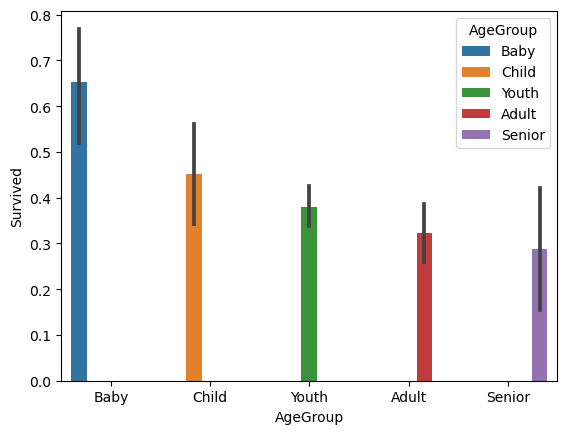

In [22]:
sns.barplot(data=train_data, x='AgeGroup', y='Survived', hue='AgeGroup')
plt.show()

**Observation**

1. Babies have a high likelihood to survive
2. Childrend and Adults have a similar likelihood to survive almost shared with youths
3. Seniors have the lowest survival rate




4. **SibSp**

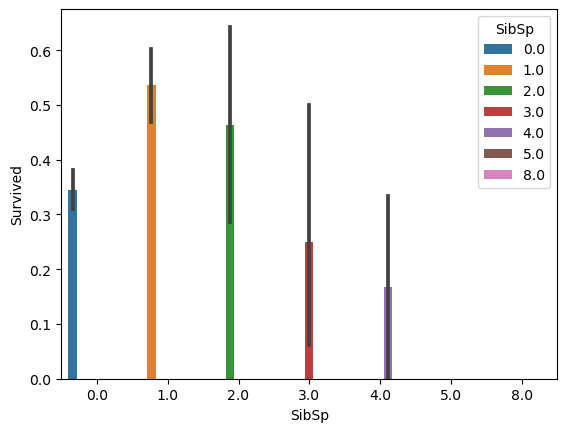

In [23]:
sns.barplot(data=train_data, x='SibSp', y='Survived', hue='SibSp')
plt.show()

**Observations**

There is a high likelihood to survive for a passenger who is alone or with only one extra person.

5. **Parch**

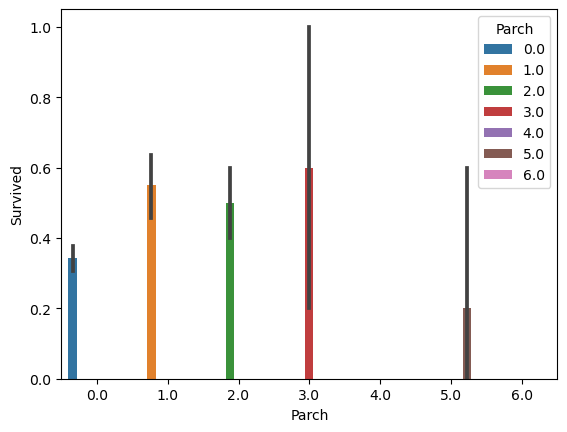

In [24]:
sns.barplot(data=train_data, x='Parch', y='Survived', hue='Parch')
plt.show()

**Observation**

Passengers with parent child relationship were more likely to survive.

6. **Ticket**

In [25]:
891 - int(df_train['Ticket'].unique().shape[0])

210

Only 210 tickets are shared among the passengers giving the impression that less could be got from the Ticket feature.

7. **Fare**

There are fares which are zero which is not factual. This notebook will impute them using Pclass means.

In [26]:
train_data[['Fare', 'Pclass']][train_data['Fare'] == 0]

,Fare,Pclass
179,0.0,3.0
263,0.0,1.0
271,0.0,3.0
277,0.0,2.0
302,0.0,3.0
413,0.0,2.0
466,0.0,2.0
481,0.0,2.0
597,0.0,3.0
633,0.0,1.0


In [27]:
pclass_mean1 = round(train_data['Fare'][train_data['Pclass'] == 1].mean(), 4)
pclass_mean2 = round(train_data['Fare'][train_data['Pclass'] == 2].mean(), 4)
pclass_mean3 = round(train_data['Fare'][train_data['Pclass'] == 3].mean(), 4)
print(f'Mean 1: {pclass_mean1}, Mean 2: {pclass_mean2}, Mean : {pclass_mean3}')

Mean 1: 84.1547, Mean 2: 20.6622, Mean : 13.6756


In [28]:
train_data['Fare'][(train_data['Pclass'] == 1) & (train_data['Fare'] == 0)] = pclass_mean1
train_data['Fare'][(train_data['Pclass'] == 2) & (train_data['Fare'] == 0)] = pclass_mean2
train_data['Fare'][(train_data['Pclass'] == 3) & (train_data['Fare'] == 0)] = pclass_mean3

C:\Users\mfaki\AppData\Local\Temp\ipykernel_30704\84957320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Fare'][(train_data['Pclass'] == 1) & (train_data['Fare'] == 0)] = pclass_mean1
C:\Users\mfaki\AppData\Local\Temp\ipykernel_30704\84957320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Fare'][(train_data['Pclass'] == 2) & (train_data['Fare'] == 0)] = pclass_mean2
C:\Users\mfaki\AppData\Local\Temp\ipykernel_30704\84957320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

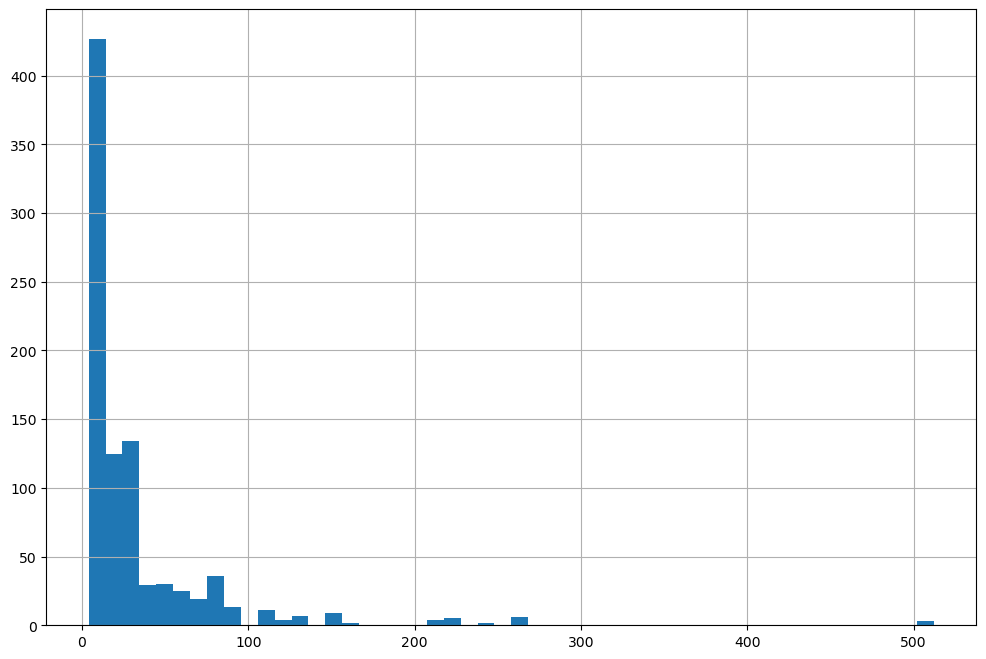

In [29]:
train_data['Fare'].hist(bins=50, figsize=(12, 8))
plt.show()

Due to the disparity of the fare this notebook will create **FareGroup** feature as classified as:

0-40 -> Low(1)

41-100 -> Mid(2)

101-200 -> High(3)

201-500+ -> V.High(4)

In [30]:
train_data['FareGroup'] = pd.cut(train_data['Fare'], bins = [0, 41, 101, 201, np.inf], labels=[1, 2, 3, 4]).astype(int)
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Sex,Embarked,PassengerId,Name,AgeGroup,FareGroup
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,male,S,1,"Braund, Mr. Owen Harris",Youth,1
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,female,C,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Adult,2
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,female,S,3,"Heikkinen, Miss. Laina",Youth,1
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,female,S,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Youth,2
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,male,S,5,"Allen, Mr. William Henry",Youth,1


8. **Embarked**

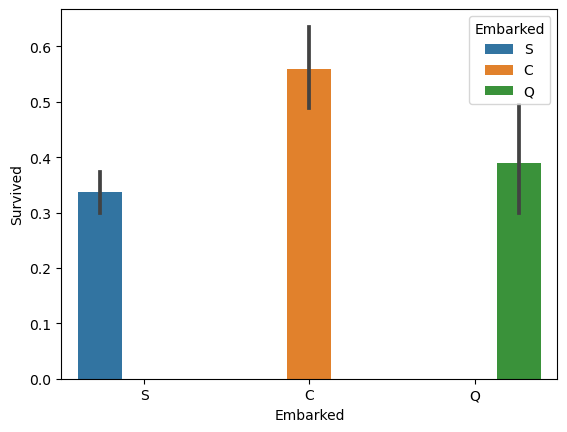

In [31]:
sns.barplot(data=train_data, x='Embarked', y='Survived', hue='Embarked')
plt.show()

**Observations**

Passengers who embarked at Cherbourg had a high likelihood of survival with those at Southampton having the lowest of the three embarkment points.

9. **Name**

In [32]:
# Funtion to take the dataframe and feature, pick the title and return a list of the titles
def titling(X, attrib):
    titles = []
    for i in range(len(X)):
        titles.append(str(df_train[attrib][i]).split('.')[0].split(',')[1].strip(' '))

    return titles

In [33]:
train_data['Title'] = titling(train_data, 'Name')
train_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

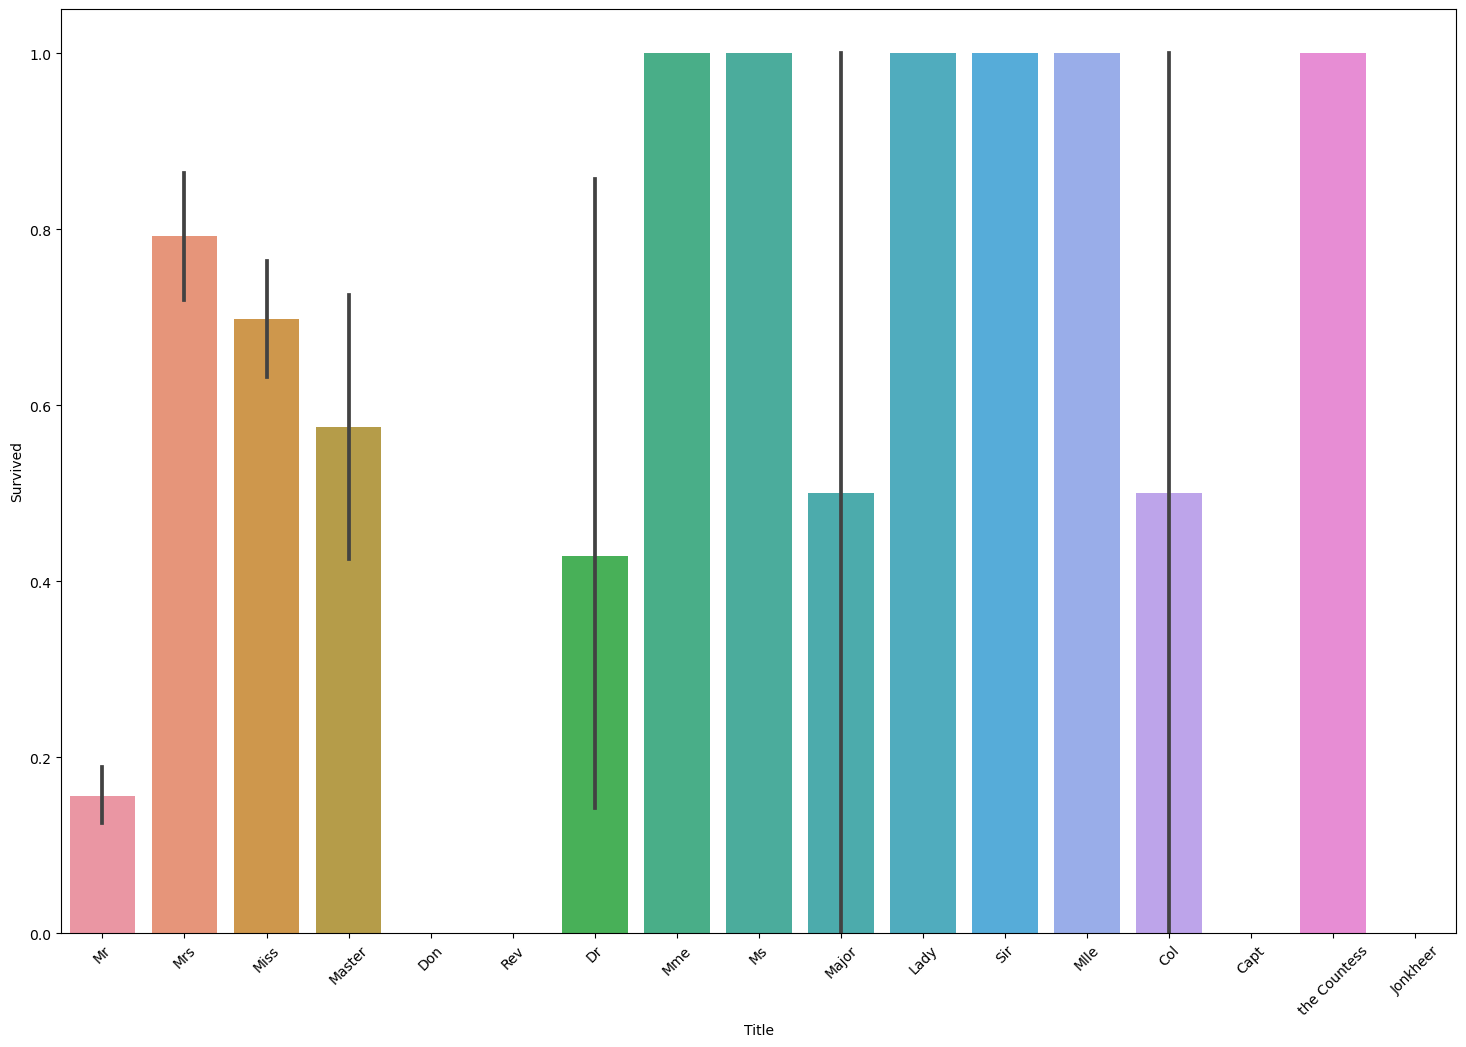

In [34]:
plt.figure(figsize=(18, 12))
g = sns.barplot(data=train_data, x='Title', y='Survived')
g.set_xticklabels(labels=train_data['Title'].unique(), rotation=45)
plt.show()

**Observations**

From the plot above there is a classification of title and their survival rate. Royal titles had a good survival rate. Common titles had a fair chance of survival and lowest level had the poorest chance in survival.

Classes for the titles will be:

[Master, Major, Lady, Sir, Col, the Countess] -> Royal(1)

[Mr, Mrs, Miss, Dr, Mme, Ms, Mlle] -> Common(2)

[Don, Rev, Capt, Jonkheer] -> Low(3)

This notebook will use label encoding.

In [35]:
def tilgrouping(X, attrib):
    royal = ['Master', 'Major', 'Lady', 'Sir', 'Col', 'the Countess']
    common = ['Mr', 'Mrs', 'Miss', 'Dr', 'Mme', 'Ms', 'Mlle']
    low = ['Don', 'Rev', 'Capt', 'Jonkheer']

    titleg = []

    for i in range(len(X[attrib])):
        if (X[attrib][i]) in royal:
            titleg.append(1)
        elif (X[attrib][i]) in common:
            titleg.append(2)
        elif (X[attrib][i]) in low:
            titleg.append(3)

    return titleg

In [36]:
train_data['TitleGroup'] = tilgrouping(train_data, 'Title')
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Sex,Embarked,PassengerId,Name,AgeGroup,FareGroup,Title,TitleGroup
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,male,S,1,"Braund, Mr. Owen Harris",Youth,1,Mr,2
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,female,C,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Adult,2,Mrs,2
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,female,S,3,"Heikkinen, Miss. Laina",Youth,1,Miss,2
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,female,S,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Youth,2,Mrs,2
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,male,S,5,"Allen, Mr. William Henry",Youth,1,Mr,2


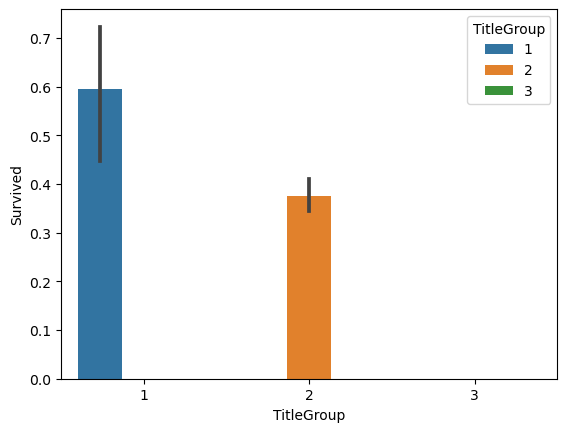

In [37]:
sns.barplot(data=train_data, x='TitleGroup', y='Survived', hue='TitleGroup')
plt.show()

**Observations**

1. Class 1 which is royal has the higest chance at survival with:
2. class 3 with the lowest chance at survival

10. **Family Size and Family Type**

The Family Size and Family type are features engineered from _SibSp_ and _Parch_ features which singly have different effects on survival and this notebook wants to explore if they are combine what their effect is.

In [38]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Sex,Embarked,PassengerId,Name,AgeGroup,FareGroup,Title,TitleGroup,FamilySize
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,male,S,1,"Braund, Mr. Owen Harris",Youth,1,Mr,2,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,female,C,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Adult,2,Mrs,2,1.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,female,S,3,"Heikkinen, Miss. Laina",Youth,1,Miss,2,0.0
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,female,S,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Youth,2,Mrs,2,1.0
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,male,S,5,"Allen, Mr. William Henry",Youth,1,Mr,2,0.0


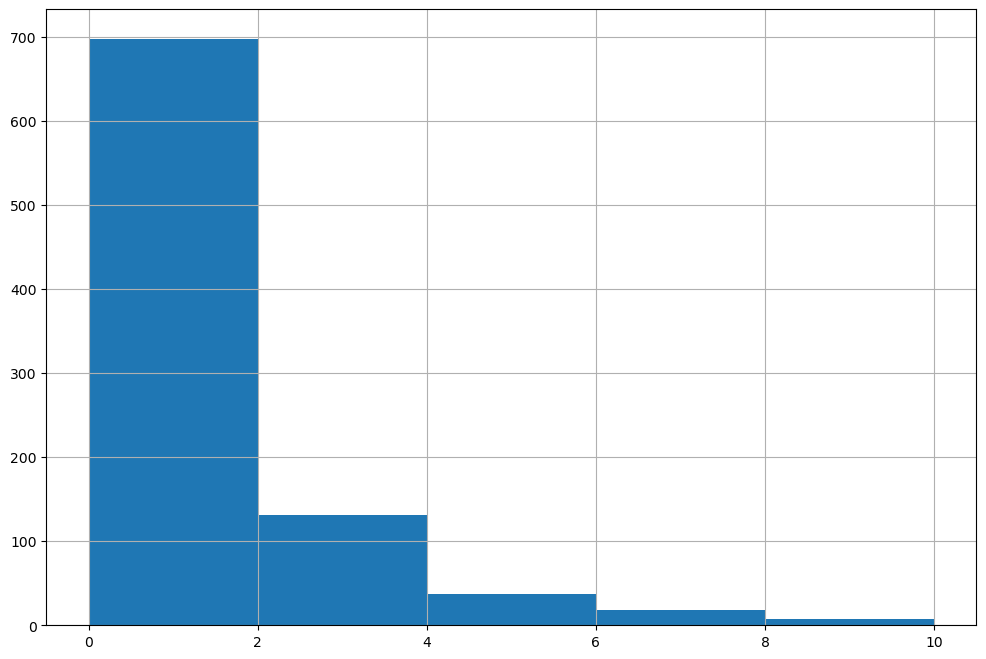

In [39]:
train_data['FamilySize'].hist(bins =5, figsize=(12, 8))
plt.show()

In [40]:
train_data['FamilyType'] = pd.cut(train_data['FamilySize'], bins=[-1, 0.5, 4, np.inf], labels=['Alone', 'Small', 'Big'])

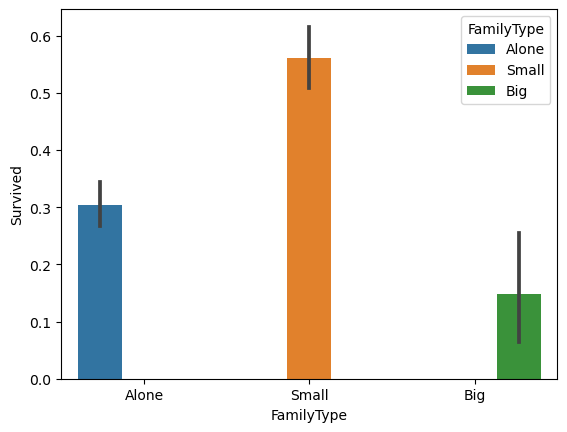

In [41]:
sns.barplot(data=train_data, x='FamilyType', y ='Survived', hue='FamilyType')
plt.show()

#### Creating a Clean Train, Validation and Test Data

Before delving into modelling and any transformation, this notebook first identifies the necessary features. Then it splits the **train_data** into **train** and **validation** datasets. Lastly transformations required follow.

Required features: 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'AgeGroup', 'FareGroup', 'TitleGroup', 'FamilySize', 'FamilyType'

Features for Encoding: 'Sex', 'Embarked', 'AgeGroup', 'FamilyType'

###### **One-Hot Encoding**
1. Sex
2. Embarked
3. AgeGroup

###### **Label Encoding**
1. FamilyType

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
                                                                 'Fare', 'Embarked', 'AgeGroup', 'FareGroup', 'TitleGroup', 'FamilySize', 'FamilyType']], train_data[['Survived']], test_size=0.3, random_state=42)

#### **One Hot Encoding**

In [43]:
dummies = pd.get_dummies(X_train[['Sex', 'Embarked', 'AgeGroup']], drop_first=True)
inputs = pd.concat([X_train.drop(['Sex', 'Embarked', 'AgeGroup'], axis=1), dummies], axis=1)

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [45]:
le.fit(inputs['FamilyType'])
inputs['FamilyType'] = le.transform(inputs['FamilyType'])

#### Testing Different Models

This notebook will try and test the following models:

1. Random Forest
2. LightGBM
3. SVC
4. KNN
5. AdaBoost

6. CatBoost

From the 6 the best will then be selected to be used to predict survival of passengers in the test dataset

In [46]:
#!pip install catboost

^C


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier

In [49]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean Score:', scores.mean())
    print('Std: ', scores.std())

1. KNN

In [50]:
knn_cls = KNeighborsClassifier()
scores_knn = cross_val_score(knn_cls, inputs, y_train.values.ravel(), scoring='accuracy', cv=10)

display_scores(scores_knn)

Scores:  [0.61904762 0.73015873 0.71428571 0.69354839 0.67741935 0.69354839
 0.67741935 0.70967742 0.72580645 0.70967742]
Mean Score: 0.6950588837685612
Std:  0.03062526383342349


2. SVC

In [51]:
svc_cls = SVC()

scores_svc = cross_val_score(svc_cls, inputs, y_train.values.ravel(), scoring='accuracy', cv=10)
display_scores(scores_svc)

Scores:  [0.68253968 0.68253968 0.71428571 0.69354839 0.62903226 0.61290323
 0.66129032 0.64516129 0.69354839 0.70967742]
Mean Score: 0.672452636968766
Std:  0.032450155074130176


3. Random Forest

In [52]:
rf_cls = RandomForestClassifier()

scores_rf = cross_val_score(rf_cls, inputs, y_train.values.ravel(), scoring='accuracy', cv=10)
display_scores(scores_rf)

Scores:  [0.80952381 0.79365079 0.84126984 0.82258065 0.82258065 0.77419355
 0.83870968 0.82258065 0.82258065 0.88709677]
Mean Score: 0.8234767025089604
Std:  0.028482383765914235


4. LightGBM

In [53]:
lgb_cls = LGBMClassifier()

scores_lgb = cross_val_score(lgb_cls, inputs, y_train.values.ravel(), scoring='accuracy', cv=10)
display_scores(scores_lgb)

[LightGBM] [Info] Number of positive: 207, number of negative: 353
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 225
[LightGBM] [Info] Number of data points in the train set: 560, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369643 -> initscore=-0.533749
[LightGBM] [Info] Start training from score -0.533749
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

5. AdaBoost

In [54]:
ada_cls = AdaBoostClassifier()

scores_ada = cross_val_score(ada_cls, inputs, y_train.values.ravel(), scoring='accuracy', cv=10)
display_scores(scores_ada)

C:\Users\mfaki\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\mfaki\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\mfaki\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\mfaki\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use t

Scores:  [0.77777778 0.77777778 0.95238095 0.87096774 0.77419355 0.77419355
 0.82258065 0.82258065 0.79032258 0.91935484]
Mean Score: 0.8282130056323604
Std:  0.061624053280435936


6. CatBoost

In [55]:
cat_features = ['Sex', 'Embarked', 'AgeGroup', 'FamilyType']
cat_cls = CatBoostClassifier(iterations=2500, learning_rate=0.05, random_seed=42, cat_features=cat_features, verbose=False)

scores_cat = cross_val_score(cat_cls, X_train, y_train.values.ravel(), scoring='accuracy', cv=10)

In [56]:
display_scores(scores_cat)

Scores:  [0.80952381 0.79365079 0.87301587 0.88709677 0.80645161 0.75806452
 0.82258065 0.85483871 0.83870968 0.91935484]
Mean Score: 0.8363287250384024
Std:  0.04572943571486252


**Observation**

From little exploration, CatBoost performs the best with very high Test and Train Scores.